In [56]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
data = pd.read_csv('sup_sales.csv')

In [58]:
data.shape

(1000, 17)

In [59]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [60]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


Data doesn't have a problem with outliers

In [61]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Data doesn't have any missing values

# =========== CLUSTERING ===========

In [62]:
categorical_columns = [name for name in data.columns if data[name].dtype == "object"]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Time',
 'Payment']

In [63]:
data['hour of purchase'] = data['Time'].apply(lambda x: int(x.split(':')[0]))

In [64]:
data.drop(categorical_columns, axis=1 , inplace=True)
data.drop(['gross income', 'gross margin percentage', 'cogs', 'Tax 5%'], axis=1 , inplace=True)

# Normalizing input values

In [65]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(data)
x_scaled.shape

(1000, 5)

## Modeling

Clustering using Kmeans

In [66]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [67]:
wcss

[4999.999999999997,
 3631.292843973783,
 3057.4426859806877,
 2693.7891465386674,
 2410.990283247628,
 2175.6129973201632,
 1979.5855201161496,
 1827.4430605307411,
 1694.4771976985428]

Text(0, 0.5, 'Within-cluster Sum of Squares')

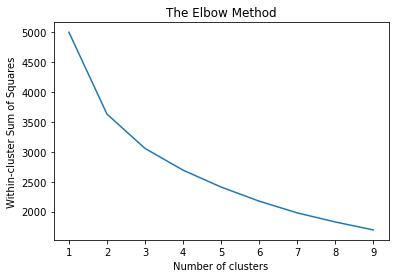

In [68]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [69]:
kmeans = KMeans(4)
kmeans.fit(x_scaled)
clusters = data.copy()
clusters['cluster_pred'] = kmeans.labels_

In [70]:
clusters

,Unit price,Quantity,Total,Rating,hour of purchase,cluster_pred
0,74.69,7,548.9715,9.1,13,2
1,15.28,5,80.2200,9.6,10,1
2,46.33,7,340.5255,7.4,13,0
3,58.22,8,489.0480,8.4,20,3
4,86.31,7,634.3785,5.3,10,2
...,...,...,...,...,...,...
995,40.35,1,42.3675,6.2,13,1
996,97.38,10,1022.4900,4.4,17,2
997,31.84,1,33.4320,7.7,13,1
998,65.82,1,69.1110,4.1,15,1


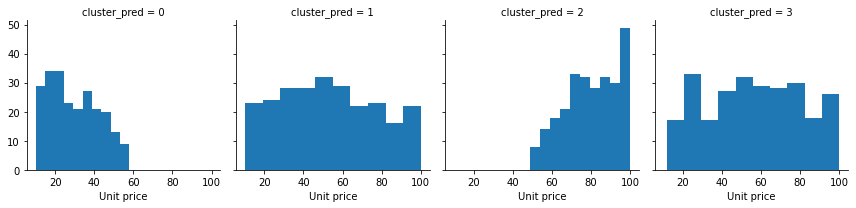

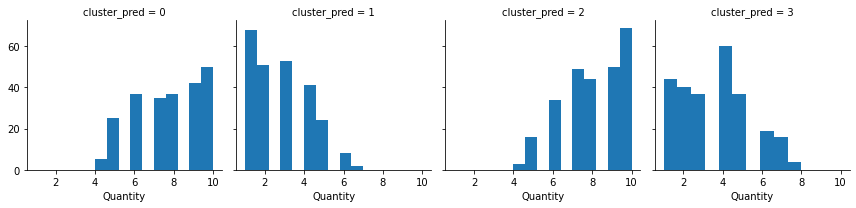

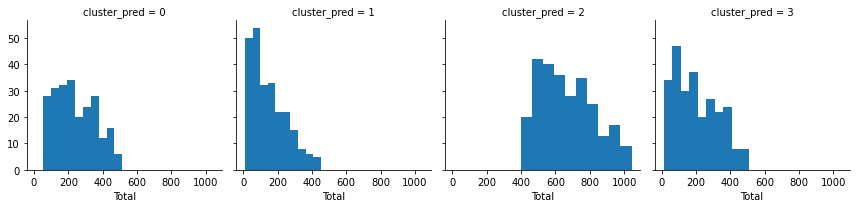

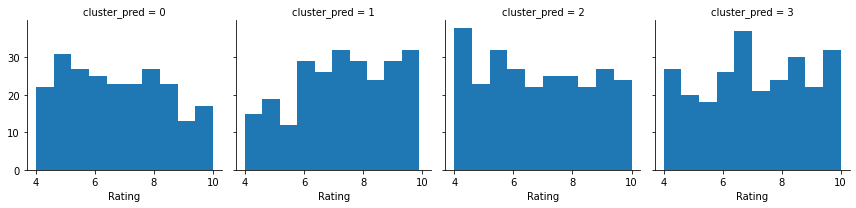

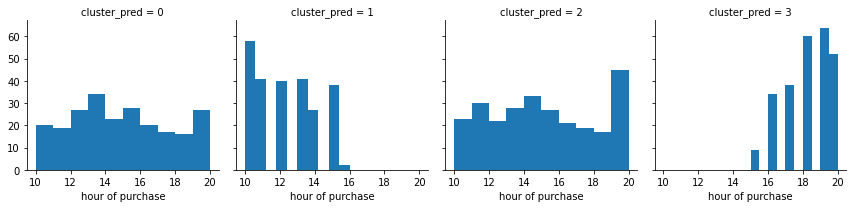

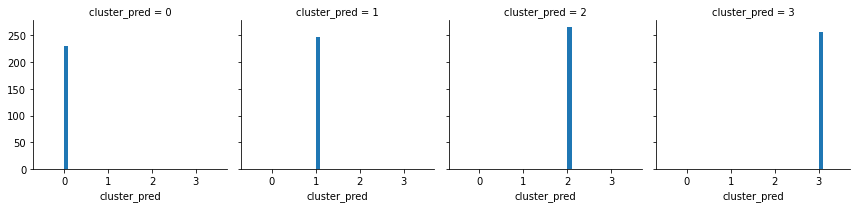

In [71]:
for cluster in clusters:
    grid = sns.FacetGrid(clusters, col='cluster_pred')
    grid.map(plt.hist, cluster)

Cluster 0 - people who don't buy much, tend to do shopping at the end of the day, give a lot of bad ratings

Cluster 1 - people who buy big ammount of expensive products

Cluster 2 - pepole who don't but much, tend to do shopping before noon, give a lot of good ratings

Cluster 3 - people who buy a lot of cheap products, mainly at evening

## Visualization (my approach)

In [72]:
pca=PCA()
pca.fit(x_scaled)
pca_data = pca.transform(x_scaled)

In [73]:
per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

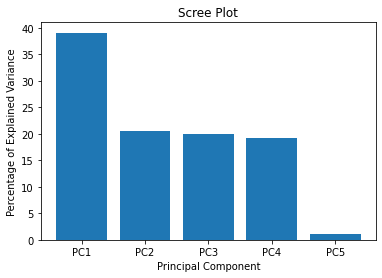

In [74]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

We can see that PC1 and PC2 explain around 57% of Variation

In [75]:
pca_df = pd.DataFrame(pca_data, index=range(1000), columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5
0,1.207869,-1.281969,-0.538450,0.344229,0.062871
1,-1.570853,-2.239773,0.672884,0.308621,0.126642
2,0.142089,-0.683316,0.567031,0.002315,-0.048932
3,0.936146,0.505283,-0.166525,1.810164,0.002836
4,1.749737,-0.435740,0.151076,-1.802663,0.068794
...,...,...,...,...,...
995,-1.873006,-0.000972,-0.240191,-0.973053,0.264477
996,3.620647,1.416719,0.250622,-0.484123,0.451528
997,-2.085798,-0.617051,-0.341561,-0.330379,0.402388
998,-1.292113,1.355154,-0.567753,-1.596686,-0.126758


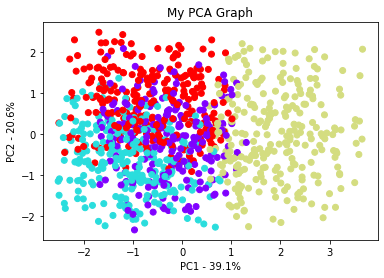

In [76]:
plt.scatter(pca_df.PC1, pca_df.PC2, c=clusters['cluster_pred'].values, cmap='rainbow')
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

    
plt.show()

## Visualization (better one)

In [77]:
dist = 1 - cosine_similarity(x_scaled)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(1000, 2)

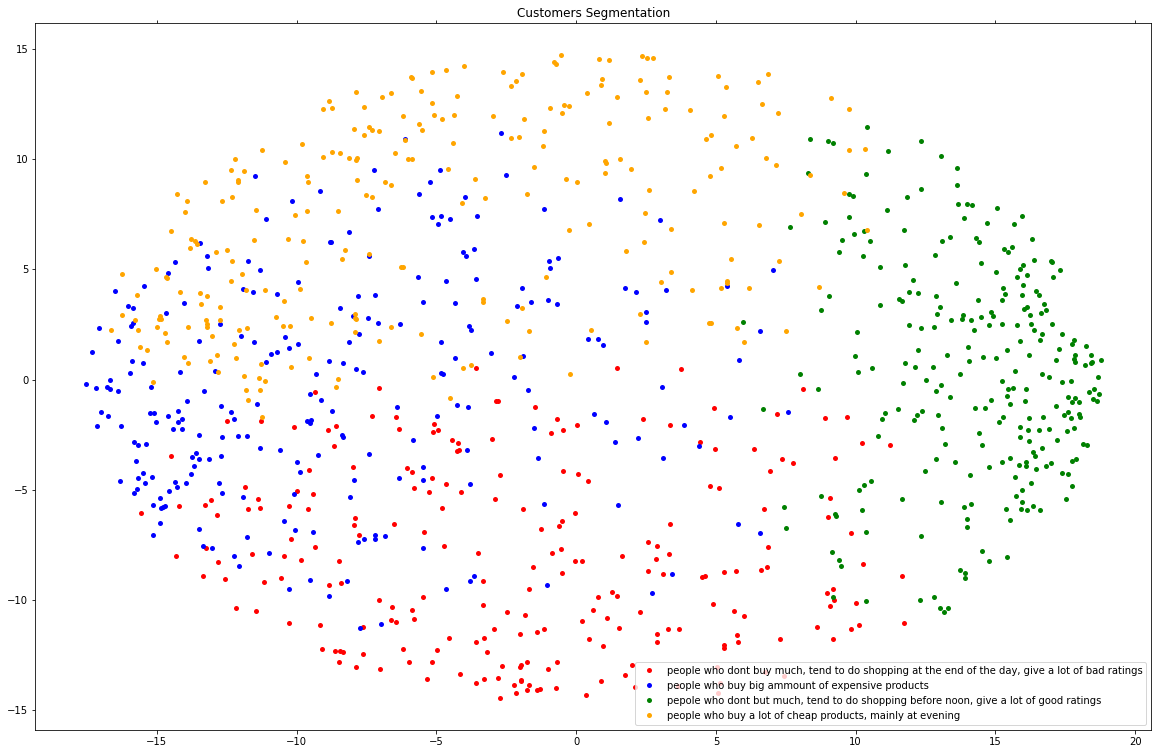

In [78]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'orange'}

names = {0: 'people who dont buy much, tend to do shopping at the end of the day, give a lot of bad ratings', 
         1: 'people who buy big ammount of expensive products', 
         2: 'pepole who dont but much, tend to do shopping before noon, give a lot of good ratings', 
         3: 'people who buy a lot of cheap products, mainly at evening'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':kmeans.labels_}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation")
plt.show()